# High level steps to build a NN with Kers API
1. Desing the model arch using tf.keras.Model --> Define the layers from tf.keras.layers
2. Compile --> set loss and optimizer
3. Fit (train)

In [17]:
import tensorflow as tf

In [18]:
X = tf.random.normal(shape=[100, 1])
y = X*3+8.2

In [19]:
X.shape, y.shape

(TensorShape([100, 1]), TensorShape([100, 1]))

In [20]:
# tf.keras.models, tf.keras.Model, tf.keras.models.Sequential()

# Debuging a layer 

In [21]:
# Define Dense layer outside the context of the model 
d = tf.keras.layers.Dense(2)

In [22]:
# Before invoking the layer
d.weights

[]

In [23]:
out = d(X)

In [24]:
out.shape

TensorShape([100, 2])

In [25]:
d.weights

[<KerasVariable shape=(1, 2), dtype=float32, path=dense_1/kernel>,
 <KerasVariable shape=(2,), dtype=float32, path=dense_1/bias>]

In [26]:
d.trainable_weights
'''
The output of the weights:
[
   Weights,
   Bias
]
'''

'\nThe output of the weights:\n[\n   Weights,\n   Bias\n]\n'

In [27]:
d.weights[0].numpy()

array([[-0.597237  , -0.18254304]], dtype=float32)

In [28]:
d.weights[1].numpy()

array([0., 0.], dtype=float32)

In [29]:
X[:3]

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[ 1.353785 ],
       [-0.6675659],
       [-1.24024  ]], dtype=float32)>

In [30]:
out[:3]

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.8085305 , -0.24712403],
       [ 0.39869505,  0.12185951],
       [ 0.7407172 ,  0.22639717]], dtype=float32)>

In [31]:
# The Linear Regression calcualtions inside the neuron for the first 3 itmes
(X[:3] * d.weights[0].numpy()[:3]) + d.weights[1].numpy()[:3]

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.8085305 , -0.24712403],
       [ 0.39869505,  0.12185951],
       [ 0.7407172 ,  0.22639717]], dtype=float32)>

# Desing a NN arch



In [32]:
#del model 

In [33]:
model = tf.keras.models.Sequential([
    # tf.keras.layers.Input --> this is one options 
    tf.keras.layers.Dense(20, input_shape=[1], activation="relu"), # Low-level features will be extracted --> much more than high-level
    tf.keras.layers.Dense(10, activation="relu"), # High-level features will be extracted --> much less than low-level
    tf.keras.layers.Dense(3, 
                          activation="sigmoid"
                         ), # The expected output 
])

/opt/conda/envs/py39_tensorflow/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 20)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283 (1.11 KB)

 Trainable params: 283 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.input_shape, model.output_shape

((None, 1), (None, 3))

In [36]:
# tf.keras.metrics.R2Score()

In [37]:
model.compile(loss="mse", # Impact the training process
              optimizer="adam", # Impact the training process
              metrics=[tf.keras.metrics.R2Score(), "mae"] # Does Not Impact the training process
             )

In [38]:
history = model.fit(x=X, y=y, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 62.1082 - mae: 7.3562 - r2_score: -6.8824
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.7141 - mae: 7.0851 - r2_score: -7.6610 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 58.2725 - mae: 7.1780 - r2_score: -7.6298
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 56.4637 - mae: 7.0926 - r2_score: -8.1986 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 55.4230 - mae: 7.0186 - r2_score: -8.0611
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 56.4851 - mae: 7.0309 - r2_score: -6.9169
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 57.3020 - mae: 7.0534 - r2_score: -6.4879 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.3089 - mae: 7.0486 - r2_score: -7.3236 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 58.8291 - mae: 7.2330 - r2_score: -7.9828  
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 55.8047 - mae: 7.0196 - r2_score: -7.2863 
Ep

In [39]:
history.history

{'loss': [57.606571197509766,
  57.499942779541016,
  57.40422058105469,
  57.30496597290039,
  57.21058654785156,
  57.12527847290039,
  57.043827056884766,
  56.96159362792969,
  56.890052795410156,
  56.81450271606445,
  56.74518966674805,
  56.678375244140625,
  56.60200119018555,
  56.5307502746582,
  56.458213806152344,
  56.380916595458984,
  56.30646514892578,
  56.217437744140625,
  56.12639617919922,
  56.03269577026367,
  55.934364318847656,
  55.833072662353516,
  55.72858428955078,
  55.615745544433594,
  55.500431060791016,
  55.38035202026367,
  55.2599983215332,
  55.141082763671875,
  55.0225944519043,
  54.906158447265625,
  54.79026794433594,
  54.66814041137695,
  54.54720687866211,
  54.42403793334961,
  54.30245590209961,
  54.180023193359375,
  54.055545806884766,
  53.932804107666016,
  53.81337356567383,
  53.69212341308594,
  53.574649810791016,
  53.45920944213867,
  53.34419250488281,
  53.229957580566406,
  53.11976623535156,
  53.009761810302734,
  52.9026

In [40]:
for i,l in enumerate(history.history["loss"]):
    print(f"Epoch {i} - Loss: {l}")

Epoch 0 - Loss: 57.606571197509766
Epoch 1 - Loss: 57.499942779541016
Epoch 2 - Loss: 57.40422058105469
Epoch 3 - Loss: 57.30496597290039
Epoch 4 - Loss: 57.21058654785156
Epoch 5 - Loss: 57.12527847290039
Epoch 6 - Loss: 57.043827056884766
Epoch 7 - Loss: 56.96159362792969
Epoch 8 - Loss: 56.890052795410156
Epoch 9 - Loss: 56.81450271606445
Epoch 10 - Loss: 56.74518966674805
Epoch 11 - Loss: 56.678375244140625
Epoch 12 - Loss: 56.60200119018555
Epoch 13 - Loss: 56.5307502746582
Epoch 14 - Loss: 56.458213806152344
Epoch 15 - Loss: 56.380916595458984
Epoch 16 - Loss: 56.30646514892578
Epoch 17 - Loss: 56.217437744140625
Epoch 18 - Loss: 56.12639617919922
Epoch 19 - Loss: 56.03269577026367
Epoch 20 - Loss: 55.934364318847656
Epoch 21 - Loss: 55.833072662353516
Epoch 22 - Loss: 55.72858428955078
Epoch 23 - Loss: 55.615745544433594
Epoch 24 - Loss: 55.500431060791016
Epoch 25 - Loss: 55.38035202026367
Epoch 26 - Loss: 55.2599983215332
Epoch 27 - Loss: 55.141082763671875
Epoch 28 - Loss: 55

In [41]:
from matplotlib import pyplot as plt

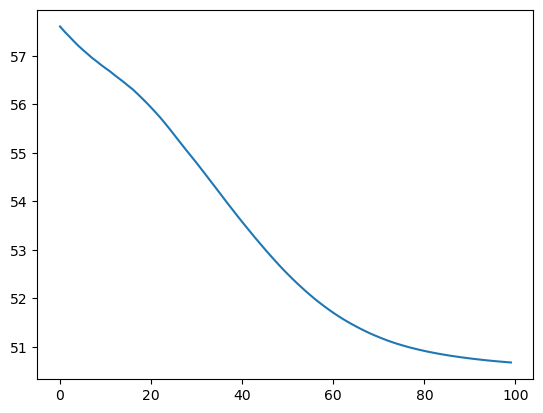

In [42]:
# Learning Curve 
plt.plot(list(range(100)), history.history["loss"])

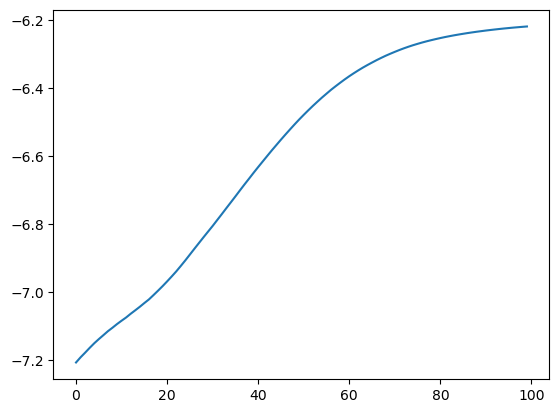

In [43]:
plt.plot(list(range(100)), history.history["r2_score"])

# Get the weight from within the model 

In [44]:
# bfore
model.layers[0].weights[0].numpy()

array([[ 0.6290218 ,  0.02637443,  0.14394958, -0.20690145, -0.37508136,
         0.5194447 ,  0.04805415,  0.5668179 ,  0.37107006,  0.552275  ,
        -0.4092711 ,  0.33934173,  0.44036722, -0.6331948 , -0.32512683,
         0.15066977, -0.7821472 ,  0.19692476,  0.3315572 , -0.46316567]],
      dtype=float32)

In [45]:
# bfore
model.layers[0].weights[0].numpy()

array([[ 0.6290218 ,  0.02637443,  0.14394958, -0.20690145, -0.37508136,
         0.5194447 ,  0.04805415,  0.5668179 ,  0.37107006,  0.552275  ,
        -0.4092711 ,  0.33934173,  0.44036722, -0.6331948 , -0.32512683,
         0.15066977, -0.7821472 ,  0.19692476,  0.3315572 , -0.46316567]],
      dtype=float32)